# Détails du code
**Auteur**: Mr X

**Date**: 01/01/2024

**Description**: Construction d'un modèle (linéaire) de prédiction pour la consommation d'énergie renouvelable en France.

# Construire conceptuellement le modèle

**Qu'est ce qu'un modèle?** 

Conceptuellement parlant, un modèle est une simplification d'un système réel ayant dans le but d'étudier son comportement. 

Un système en soi est compris de variable(s) expliquée(s) (variable dont on voudra comprendre le comportement) et de variables explicatives (variables qui nous permettront d'expliquer le comportement de la variable expliquée). 
Dans le but de notre simplifcation, il est utile de commencer par se représenter un système sous forme de Graph Orienté Acyclique (DAG pour Directed Acyclic Graph). 

Dans sa forme la plus simple, un DAG pour être le schéma suivant 

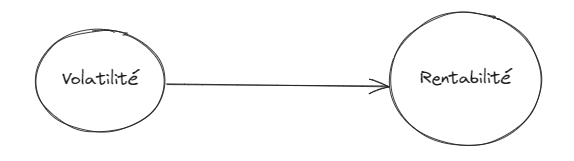

Dans ce modèle financier ultra-simplifié, nous modélisons les rentabilités comme étant dépendante de la volatilité. En soi, le modèle n'est pas complétement idiot. La rentabilité financière vient généralement du niveau de risque associé à un investissement. Le risque étant usuellement mesuré par la volatilité du cours boursier, on trouve alors naturel de se représenter notre modèle de la manière ci-dessus. 

Néanmoins, dans notre cas, nous tentons de **modéliser la consommation d'énergie renouvelables en France (en Twh)**. 

Nous devons alors nous poser la question, d'où vient la consommation d'énergie renouvelable et quelles sont les variables importantes qui impactent cette consommation?

Commençons avec un modèle, encore une fois, ultra-simplifié. Prenons pour hypothèse que la consommation d'énergie renouvelable ne dépends seulement du temps qui passe. C'est à dire qu'il n'y a pas de variables en soi qui impactent la consommation mais cette dernière suit une tendance avec le temps. 

Dans ce cas, on obtient le modèle suivant:

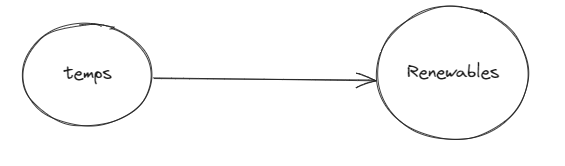


Tentons de coder ce modèle sur python, est essayons de l'interpréter. 

# Un modèle simple: La consommation d'énergie renouvelable suit une tendance linéaire en France

Commençons par importer les packages qui nous servirons à travers notre modélisation. 

- Pandas est un package très utile dans la gestion des données sous python. Il permet la création de DataFrame et leur manipulation.
- Matplotlib est une API qui permet la création simplifiée de graphique sous python.
- Statsmodels sera notre moteur à modèle. Ce package se spécialise dans l'optimisation de modèles statistiques. 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

## Importer les données

Notre jeu de données nous donne les informations suivantes entre 1965 et 2021 en France:
- **Coal**: Consommation de Charbon en Twh - (float)
- **All_Fossil**: Consommation totate d'énergie fossile (Charbon + Gaz + Pétrole) en Twh - (float)
- **Gas**: Consommation de Gaz en Twh - (float)
- **GDP_per_cap**: PIB per capita - (float)
- **Life_exp**: Espérance de vie - (float)
- **Other_renew**: Consommation d'énergie renouvelables autres (biomasse, etc.) en Twh - (float)
- **Solar**: Consommation d'énergie solaire en Twh - (float)
- **Wind**: Consommation d'énergie éolienne en Twh - (float)
- **Hydro**: Consommation d'énergie hydrolique en Twh - (float)
- **Oil**: Consommation de Pétrole en Twh - (float)
- **Nuclear**: Consommation d'énergie nucléaire en Twh - (float)
- **Pop**: Démographie en France - (float)
- **Urban**: Population en zone urbaine en France - (float)
- **Rural**: Population en zone rurale en France - (float)
- **All_renew**: Consommation totale d'énergie renouvelable (Vent + Soleil + Hydro + Autres) en Twh - (float)

La source des données est une combinaison de différents jeux de données disponibles sur *ourworldindata.org*.

In [64]:
df = pd.read_csv('France_Energy_1965_2021.csv')
df_cleaned = df.fillna(method='ffill').fillna(method='bfill')
df_cleaned.rename(columns={'Unnamed: 0':'Temps'}, inplace=True)
df_cleaned

/tmp/ipykernel_16831/793863971.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill').fillna(method='bfill')


,Temps,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,Oil,Nuclear,Pop,Urban,Rural,All_renew
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,0.000000,0.000272,46.881092,637.30140,52.840233,48168800,33054437,16228319,46.881092
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,0.000000,0.000272,52.208470,683.12300,81.308180,48683090,33987676,15829365,52.598470
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,0.000000,0.000272,45.377660,784.79000,119.774560,49181404,34910161,15423851,45.982660
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,0.000000,0.000272,50.422610,850.43164,176.318530,49647270,35692859,15124161,51.348610
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,0.000000,0.000272,52.942090,982.66754,203.945980,50087056,36223125,15049558,54.009090
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,0.000000,0.000272,56.681484,1116.33080,320.742220,50523588,36752571,14971545,58.051730
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,0.000000,0.000272,48.856724,1216.74850,519.341060,50970696,37291038,14894184,50.248547
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,0.000000,0.000272,48.831467,1350.95720,805.327500,51410364,37825586,14812302,50.346662
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,0.000000,0.000272,47.696262,1506.02560,807.814900,51814076,38334453,14719207,49.246348
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,0.000000,0.000272,56.230286,1430.98770,800.172600,52163550,38806179,14609071,57.807345


In [71]:
df_cleaned['pop_tot']=df_cleaned['Urban']+df_cleaned['Rural']
df_cleaned['Urban_prop']=df_cleaned['Urban']/df_cleaned['pop_tot']
df_cleaned['Rural_prop']=df_cleaned['Rural']/df_cleaned['pop_tot']
df = df_cleaned
df

,Temps,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,...,Pop,Urban,Rural,All_renew,pop_tot,%Urban,%Rural,All_renew_mobile5,Urban_prop,Rural_prop
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,0.000000,0.000272,46.881092,...,48168800,33054437,16228319,46.881092,49282756,0.67071,0.32929,46.881092,0.67071,0.32929
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,0.000000,0.000272,52.208470,...,48683090,33987676,15829365,52.598470,49817041,0.68225,0.31775,49.739781,0.68225,0.31775
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,0.000000,0.000272,45.377660,...,49181404,34910161,15423851,45.982660,50334012,0.69357,0.30643,48.487407,0.69357,0.30643
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,0.000000,0.000272,50.422610,...,49647270,35692859,15124161,51.348610,50817020,0.70238,0.29762,49.202708,0.70238,0.29762
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,0.000000,0.000272,52.942090,...,50087056,36223125,15049558,54.009090,51272683,0.70648,0.29352,50.163984,0.70648,0.29352
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,0.000000,0.000272,56.681484,...,50523588,36752571,14971545,58.051730,51724116,0.71055,0.28945,52.398112,0.71055,0.28945
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,0.000000,0.000272,48.856724,...,50970696,37291038,14894184,50.248547,52185222,0.71459,0.28541,51.928127,0.71459,0.28541
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,0.000000,0.000272,48.831467,...,51410364,37825586,14812302,50.346662,52637888,0.71860,0.28140,52.800928,0.71860,0.28140
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,0.000000,0.000272,47.696262,...,51814076,38334453,14719207,49.246348,53053660,0.72256,0.27744,52.380475,0.72256,0.27744
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,0.000000,0.000272,56.230286,...,52163550,38806179,14609071,57.807345,53415250,0.72650,0.27350,53.140126,0.72650,0.27350


In [72]:
df['All_renew_mobile5']=df['All_renew'].rolling(window=5,min_periods=1).mean()
df

,Temps,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,...,Pop,Urban,Rural,All_renew,pop_tot,%Urban,%Rural,All_renew_mobile5,Urban_prop,Rural_prop
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,0.000000,0.000272,46.881092,...,48168800,33054437,16228319,46.881092,49282756,0.67071,0.32929,46.881092,0.67071,0.32929
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,0.000000,0.000272,52.208470,...,48683090,33987676,15829365,52.598470,49817041,0.68225,0.31775,49.739781,0.68225,0.31775
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,0.000000,0.000272,45.377660,...,49181404,34910161,15423851,45.982660,50334012,0.69357,0.30643,48.487407,0.69357,0.30643
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,0.000000,0.000272,50.422610,...,49647270,35692859,15124161,51.348610,50817020,0.70238,0.29762,49.202708,0.70238,0.29762
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,0.000000,0.000272,52.942090,...,50087056,36223125,15049558,54.009090,51272683,0.70648,0.29352,50.163984,0.70648,0.29352
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,0.000000,0.000272,56.681484,...,50523588,36752571,14971545,58.051730,51724116,0.71055,0.28945,52.398112,0.71055,0.28945
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,0.000000,0.000272,48.856724,...,50970696,37291038,14894184,50.248547,52185222,0.71459,0.28541,51.928127,0.71459,0.28541
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,0.000000,0.000272,48.831467,...,51410364,37825586,14812302,50.346662,52637888,0.71860,0.28140,52.800928,0.71860,0.28140
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,0.000000,0.000272,47.696262,...,51814076,38334453,14719207,49.246348,53053660,0.72256,0.27744,52.380475,0.72256,0.27744
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,0.000000,0.000272,56.230286,...,52163550,38806179,14609071,57.807345,53415250,0.72650,0.27350,53.140126,0.72650,0.27350


In [73]:
df_OPEP = pd.read_csv('OPEP.csv', delimiter=';')
df_merge = pd.concat([df, df_OPEP['Price_oil']], axis=1)
df_merge



,Temps,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,...,Urban,Rural,All_renew,pop_tot,%Urban,%Rural,All_renew_mobile5,Urban_prop,Rural_prop,Price_oil
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,0.000000,0.000272,46.881092,...,33054437,16228319,46.881092,49282756,0.67071,0.32929,46.881092,0.67071,0.32929,"1,42"
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,0.000000,0.000272,52.208470,...,33987676,15829365,52.598470,49817041,0.68225,0.31775,49.739781,0.68225,0.31775,"1,36"
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,0.000000,0.000272,45.377660,...,34910161,15423851,45.982660,50334012,0.69357,0.30643,48.487407,0.69357,0.30643,"1,33"
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,0.000000,0.000272,50.422610,...,35692859,15124161,51.348610,50817020,0.70238,0.29762,49.202708,0.70238,0.29762,"1,32"
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,0.000000,0.000272,52.942090,...,36223125,15049558,54.009090,51272683,0.70648,0.29352,50.163984,0.70648,0.29352,"1,27"
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,0.000000,0.000272,56.681484,...,36752571,14971545,58.051730,51724116,0.71055,0.28945,52.398112,0.71055,0.28945,"1,21"
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,0.000000,0.000272,48.856724,...,37291038,14894184,50.248547,52185222,0.71459,0.28541,51.928127,0.71459,0.28541,"1,70"
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,0.000000,0.000272,48.831467,...,37825586,14812302,50.346662,52637888,0.71860,0.28140,52.800928,0.71860,0.28140,"1,82"
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,0.000000,0.000272,47.696262,...,38334453,14719207,49.246348,53053660,0.72256,0.27744,52.380475,0.72256,0.27744,"2,70"
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,0.000000,0.000272,56.230286,...,38806179,14609071,57.807345,53415250,0.72650,0.27350,53.140126,0.72650,0.27350,11


In [74]:
df_merge['Coal/All_Fossil']=df_merge['Coal']/df_merge['All_Fossil']
df_merge

,Temps,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,...,Rural,All_renew,pop_tot,%Urban,%Rural,All_renew_mobile5,Urban_prop,Rural_prop,Price_oil,Coal/All_Fossil
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,0.000000,0.000272,46.881092,...,16228319,46.881092,49282756,0.67071,0.32929,46.881092,0.67071,0.32929,"1,42",0.411760
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,0.000000,0.000272,52.208470,...,15829365,52.598470,49817041,0.68225,0.31775,49.739781,0.68225,0.31775,"1,36",0.377254
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,0.000000,0.000272,45.377660,...,15423851,45.982660,50334012,0.69357,0.30643,48.487407,0.69357,0.30643,"1,33",0.342400
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,0.000000,0.000272,50.422610,...,15124161,51.348610,50817020,0.70238,0.29762,49.202708,0.70238,0.29762,"1,32",0.314443
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,0.000000,0.000272,52.942090,...,15049558,54.009090,51272683,0.70648,0.29352,50.163984,0.70648,0.29352,"1,27",0.284274
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,0.000000,0.000272,56.681484,...,14971545,58.051730,51724116,0.71055,0.28945,52.398112,0.71055,0.28945,"1,21",0.249637
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,0.000000,0.000272,48.856724,...,14894184,50.248547,52185222,0.71459,0.28541,51.928127,0.71459,0.28541,"1,70",0.217390
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,0.000000,0.000272,48.831467,...,14812302,50.346662,52637888,0.71860,0.28140,52.800928,0.71860,0.28140,"1,82",0.181208
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,0.000000,0.000272,47.696262,...,14719207,49.246348,53053660,0.72256,0.27744,52.380475,0.72256,0.27744,"2,70",0.163493
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,0.000000,0.000272,56.230286,...,14609071,57.807345,53415250,0.72650,0.27350,53.140126,0.72650,0.27350,11,0.171005


## Visualiser les données

En utilisant matplotlib, tentons de visualiser l'évolution de la consommation d'ER en France, entre 1965 et 2021. 

Il est toujours important de vérifier visuellement si notre modèle risque d'être cohérent. A première vue, il semble que la consommation d'ER suit une tendance à la hausse. Il semble discutable que cette tendance soit linéaire mais tentons le plus simple avant de complexifier!

## Comment construire notre modèle simple de tendance linéaire? 

Notre modèle est linéaire, et donc, suit la forme suivante: 

$$ All\_renew = \alpha + \beta * Temps + \varepsilon $$

En termes non mathématiques, nous modélisons notre consommation d'ER avec: 
- La consommation au départ de notre échantillon ($\alpha$)
- La tendance, qui est la relation entre la consommation d'ER et le temps ($\beta$)
- Une erreur (oui notre modèle n'est pas parfait!) entre prédiction du modèle et réalité ($\varepsilon$).

Si $\beta$ est positif, nous observons une tendance à la hausse. Si négative, la tendance est à la baisse. Si nul, il n'y alors pas de tendance! 

Les plus initiés d'entre vous l'aurons déjà réalisé, il s'agit d'une régression linéaire. Un modèle simple mais particulièrement versatile. En soi, mettre en action notre modèle, se traduit mathématiquement par l'estimation des paramètres $\alpha$ et $\beta$. 

Traduisons donc notre modèle en code python. 

Il nous faut tout d'abord une variable temps. Cette variable prends la valeur $1$ pour la première année de notre échantillon et avance de $1$ chaque année. En code, nous le traduisons de la manière suivante: 

Je rajoute une colonne "Temps" à mon jeu de donnée. Cette colonne enregistre une liste allant de 1 (pour l'année 1965) à 57 (pour l'année 2021)

In [95]:
df_merge['index_temps'] = [i for i in range(1, len(df_merge)+1)]
df_merge['Price_oil'] = df_merge['Price_oil'].str.replace(',','.')
df_merge

,Temps,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,...,pop_tot,%Urban,%Rural,All_renew_mobile5,Urban_prop,Rural_prop,Price_oil,Coal/All_Fossil,index_temps,Prediction_1
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,0.000000,0.000272,46.881092,...,49282756,0.67071,0.32929,46.881092,0.67071,0.32929,1.42,0.411760,1,42.691343
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,0.000000,0.000272,52.208470,...,49817041,0.68225,0.31775,49.739781,0.68225,0.31775,1.36,0.377254,2,49.806029
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,0.000000,0.000272,45.377660,...,50334012,0.69357,0.30643,48.487407,0.69357,0.30643,1.33,0.342400,3,50.245176
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,0.000000,0.000272,50.422610,...,50817020,0.70238,0.29762,49.202708,0.70238,0.29762,1.32,0.314443,4,52.792791
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,0.000000,0.000272,52.942090,...,51272683,0.70648,0.29352,50.163984,0.70648,0.29352,1.27,0.284274,5,52.185891
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,0.000000,0.000272,56.681484,...,51724116,0.71055,0.28945,52.398112,0.71055,0.28945,1.21,0.249637,6,53.789190
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,0.000000,0.000272,48.856724,...,52185222,0.71459,0.28541,51.928127,0.71459,0.28541,1.70,0.217390,7,53.818111
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,0.000000,0.000272,48.831467,...,52637888,0.71860,0.28140,52.800928,0.71860,0.28140,1.82,0.181208,8,55.290350
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,0.000000,0.000272,47.696262,...,53053660,0.72256,0.27744,52.380475,0.72256,0.27744,2.70,0.163493,9,53.713519
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,0.000000,0.000272,56.230286,...,53415250,0.72650,0.27350,53.140126,0.72650,0.27350,11,0.171005,10,56.390267


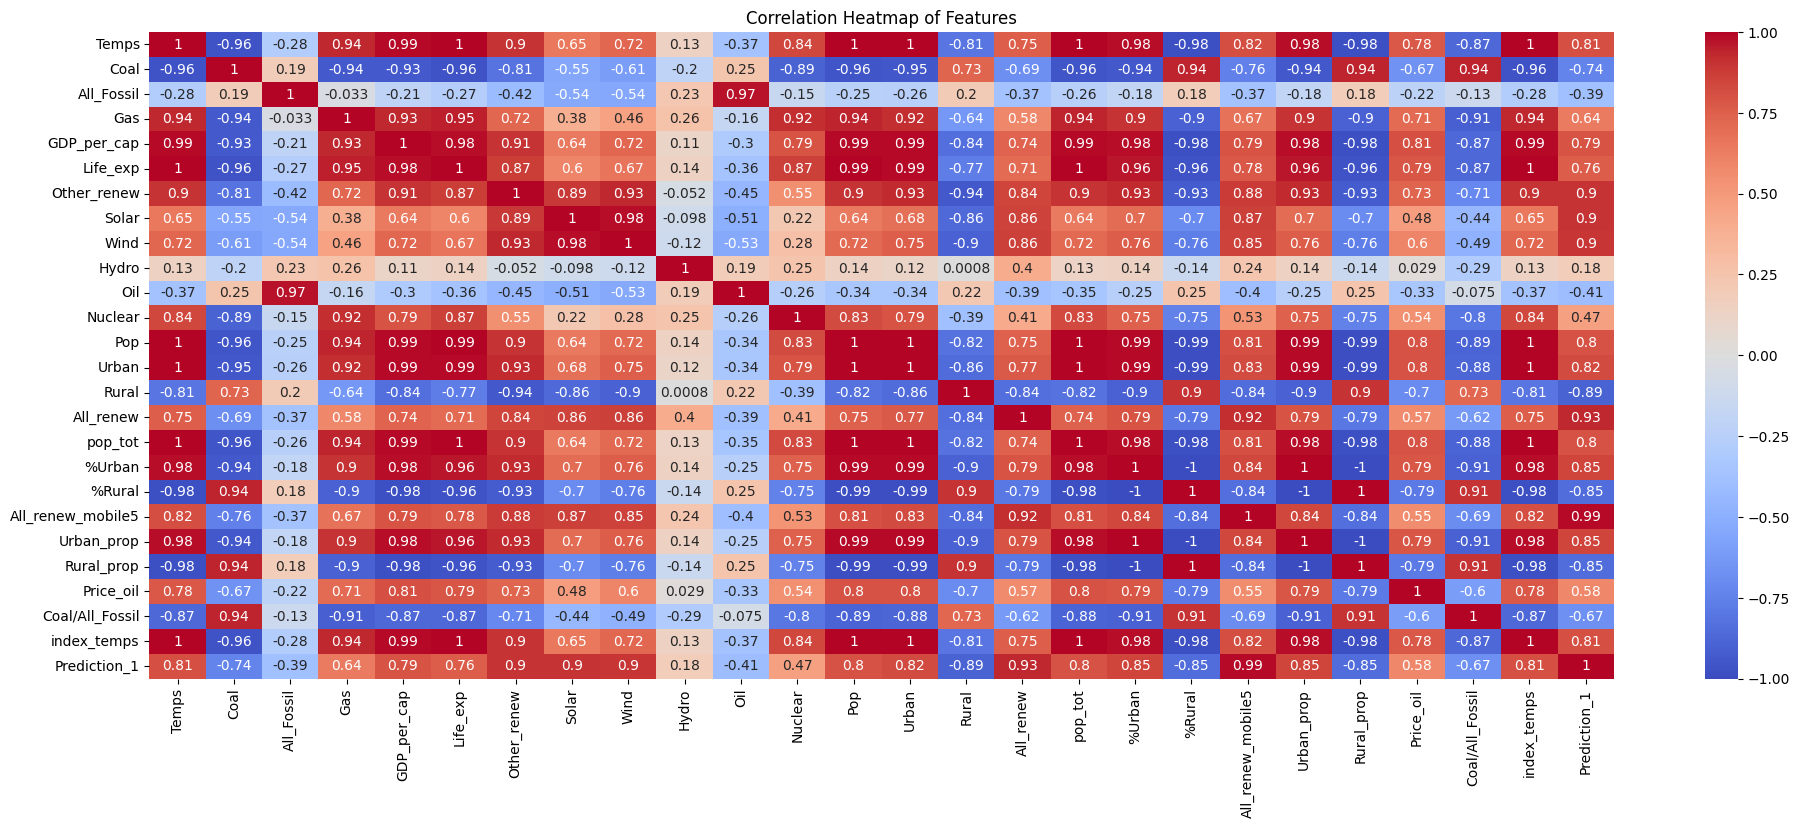

In [101]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 2)
sns.heatmap(df_merge.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')

plt.tight_layout()
plt.show()



Construisons maintenant notre modèle sous le package: statmodels. 

Nous prenons la fonction 'OLS' (Ordinary Least Squares) du package, qui correspond à notre modèle linéaire simple. La fonction prends alors deux entrées: 
1. La formule mathématique pour notre modèle: **'All_renew ~ Temps'**. Cette dernière se traduit directement par: La consomation d'ER est fonction linéaire du temps. (Le paramètre $\alpha$ est implicitement ajouté à cette formule.)
2. La source des données: df. Nos variables **"All_renew"** et **"Temps"** sont des colonnes dans notre DataFrame df.

La fonction .fit() s'occupe de faire tourner le modèle et calcule les valeurs de $\beta$ et $\alpha$. 

In [92]:
model = sm.OLS.from_formula('All_renew ~ index_temps + GDP_per_cap + Urban_prop + Coal/All_Fossil + All_renew_mobile5', data=df_merge)
results = model.fit()

In [93]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     54.35
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.30e-20
Time:                        14:47:23   Log-Likelihood:                -186.77
No. Observations:                  57   AIC:                             387.5
Df Residuals:                      50   BIC:                             401.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -306.5681    146.653     -2.090      0.042    -601.130     -12.006
index_temps          -1.5397      0.820     -1.878      0.066      -3.187       0.107
GDP_per_cap           0.0011      0.001      1.037      0.305      -0.001       0.003
Urban_prop          427.9936    220.932      1.937      0.058     -15.762     871.749
Coal                  0.0500      0.040      1.247      0.218      -0.031       0.131
Coal:All_Fossil    -4.74e-05   2.46e-05     -1.925      0.060   -9.69e-05    2.06e-06
All_renew_mobile5     1.1028      0.147      7.506      0.000       0.808       1.398
==============================================================================
Omnibus:                        0.813   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.267
Skew:                           0.087   Prob(JB):                        0.875
Kurtosis:                       3.287   Cond. No.                     1.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

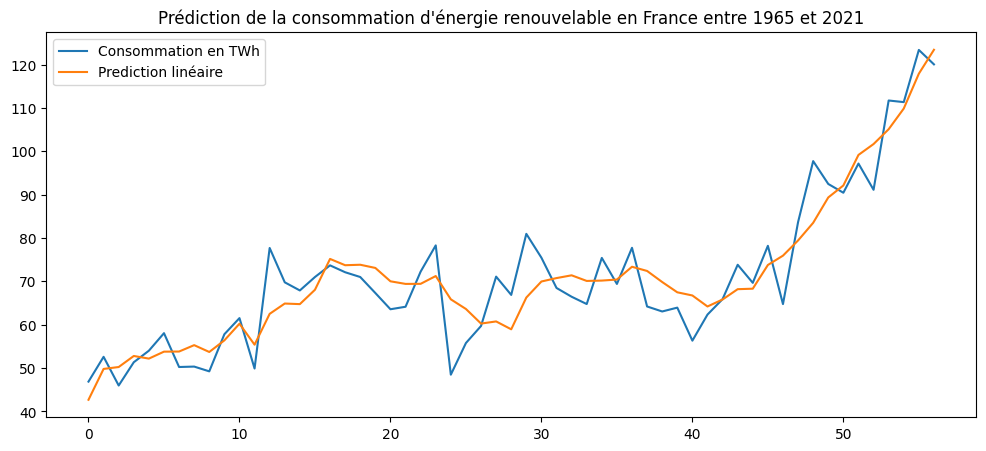

In [81]:
df_merge['Prediction_1'] = results.predict()
plt.figure(figsize=(12,5))
plt.title('Prédiction de la consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df_merge['All_renew'], label='Consommation en TWh')
plt.plot(df_merge['Prediction_1'], label='Prediction linéaire')
plt.legend(loc='best')
plt.show()

Tentons maintenant de comprendre le résultat de notre modèle. 

Les informations importantes sont: 

- Le **R_squared**: Le $R^2$ représente le pourcentage de variation expliqué par le modèle. En termes simples, un $R^2 = 0$ correspond à un modèle qui n'explique rien. Dans ce cas là, notre variable Temps ne prédirerait strictement rien de notre consommation d'ER. Au contraire, un $R^2 = 1$ expliquerait tout. La totalité de la consommation d'ER se résumerait à une fonction linéaire du temps.
- Les valeurs de la colonne **coef**: Ici sont les valeurs qui nous intéresse au départ! La première (intercept) correspond à $\alpha$. Cette valeur est le point de départ de notre courbe. Pour l'année 1965, la consommation d'ER était donc de 47 Twh. La deuxième valeur (Temps), correspond au $\beta$. La valeur étant de 0.8, cela implique que chaque année, la consommation d'ER augmente de 0.8 Twh.
- Les valeurs de la colonne **P>|t|**: Ces valeurs nous indiquent de la significativité de nos coefficients. Simplement, pouvons nous croire que la valeur de notre coefficients $\alpha$ et $\beta$ sont rééllement différent de 0. Une p-value valeur suffisament basse indique la significativité de notre coefficient. 

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     70.81
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.85e-11
Time:                        15:30:34   Log-Likelihood:                -220.69
No. Observations:                  57   AIC:                             445.4
Df Residuals:                      55   BIC:                             449.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6079      3.176     14.992      0.000      41.244      53.972
Temps          0.8015      0.095      8.415      0.000       0.611       0.992
==============================================================================
Omnibus:                        0.972   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.662
Skew:                           0.264   Prob(JB):                        0.718
Kurtosis:                       3.017   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dans notre cas, nous avons un modèle avec un beau $R^2$ de $0.563$ et des coefficients significatifs. Le $\beta$ est positif et donc indique la présence d'une tendance linéaire à la hausse. 

Tentons maintenant de visualiser note modèle et de le comparer à la réalité. 

La fonction predict.() permet de calculer les valeurs que notre modèle aurait donné à l'intérieur de notre échantillon. 

In [ ]:
df['Prediction_1'] = results.predict()

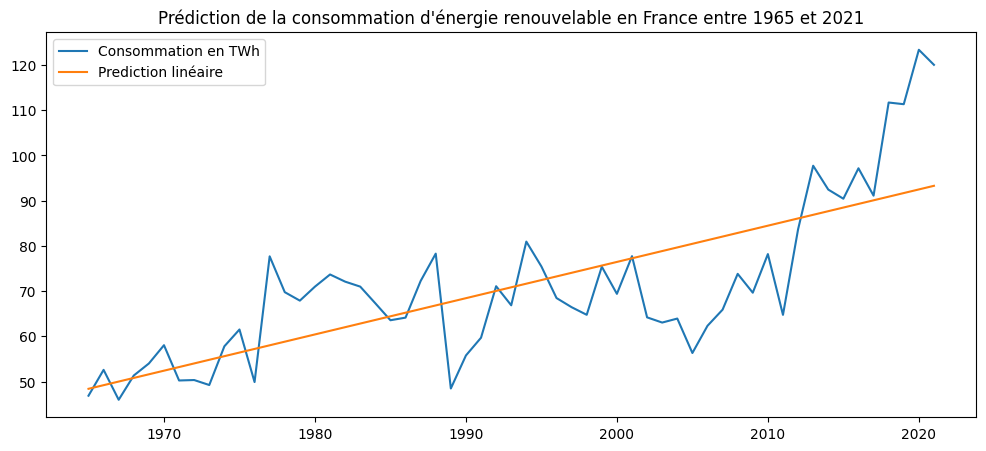

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Prédiction de la consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df['All_renew'], label='Consommation en TWh')
plt.plot(df['Prediction_1'], label='Prediction linéaire')
plt.legend(loc='best')
plt.show()

La tendance a l'air claire mais notre modèle rate de nombreuses variations dans la consommation d'ER. D'où viennent ces variations? 

Ce que notre humble modèle montre c'est que la consommation d'ER à l'air d'augmenter avec le temps. Mais il ne nous donne aucune raison quant à pourquoi cette augmentation s'opère. 

Avant de se tourner vers ces questions, pouvont-nous améliorer notre modèle dans l'estimation d'une tendance? 

Certainement! Notre modèle faisait l'hypothèse d'une relation linéaire entre le temps et la consommation tel que celui ci-dessous:

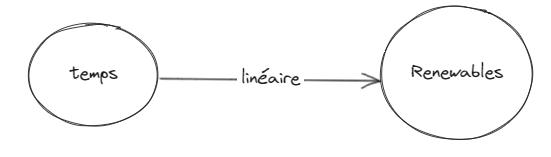

Tentons de mettre à l'épreuve cette hypothèse avec un modèle alternatif: 

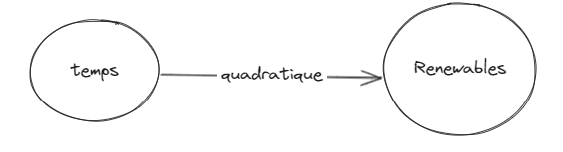


# Un modèle alternatif: La consommation d'énergie renouvelable suit une tendance quadratique en France

Un modèle quadratique n'est pas bien plus compliqué d'un cours de mathématiques en terminale. Nous remplaçons simplement notre variable **Temps** par une variable **Temps^2**. 

Formellement: 
$$ All\_renew = \alpha + \beta * Temps^2  + \varepsilon $$ 

Il s'agit donc de répéter le processus précédent en substituant **Temps** par **Temps^2**.

In [ ]:
df['Temps_2'] = [i**2 for i in range(1,len(df)+1)]

In [ ]:
model_2 = sm.OLS.from_formula('All_renew ~ Temps_2', data=df)
results_2 = model_2.fit()

Arretons-nous maintenant sur les résultats de notre nouveau modèle. 

1. Nous pouvons voir une augmentation du $R^2$ à $62.9\%$. C'est une augmentation non-triviale. Ceci indique que notre modèle correspond, d'une certaine manière, mieux à nos données.
2. La valeur des coefficients change nécessairement mais notre $\beta$ est toujours positif (ce qui indique une tendance de la consommation d'ER d'augmenter de plus en plus rapidement).
3. Nos coefficients sont toujours fortement significatifs. 

In [ ]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     93.30
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.90e-13
Time:                        16:19:37   Log-Likelihood:                -216.00
No. Observations:                  57   AIC:                             436.0
Df Residuals:                      55   BIC:                             440.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.1083      2.177     25.313      0.000      50.745      59.471
Temps_2        0.0142      0.001      9.659      0.000       0.011       0.017
==============================================================================
Omnibus:                        0.977   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.895
Skew:                           0.062   Prob(JB):                        0.639
Kurtosis:                       2.399   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comparons maintenant nos deux modèles de manière visuelle**

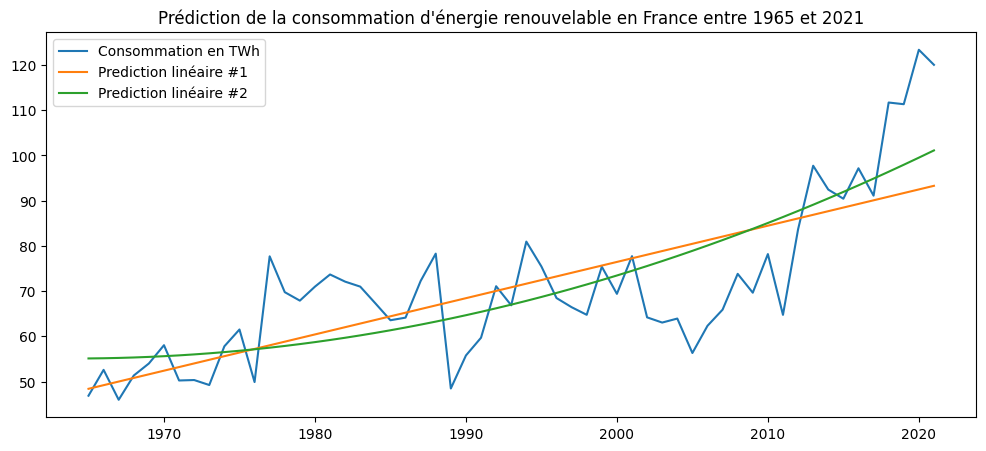

In [ ]:
df['Prediction_2'] = results_2.predict()

plt.figure(figsize=(12,5))
plt.title('Prédiction de la consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df['All_renew'], label='Consommation en TWh')
plt.plot(df['Prediction_1'], label='Prediction linéaire #1')
plt.plot(df['Prediction_2'], label='Prediction linéaire #2')
plt.legend(loc='best')
plt.show()

Notre modèle quadratique à l'air effectivement de nettement mieux représenter la tendance de consommation d'ER. Notre modèle nous permet donc de dire que la consommation d'ER à l'air de s'accélérer depuis les années 1970s. 

Il faut néanmoins rester vigilant dans notre interprétation. 

1. Nous sommes encores dans l'espace modèle. Nous avons une prédiction mais notre modèle ne nous apporte aucune explication quant aux raisons de cette tendance. A quoi est dû ce comportement dans la consommation d'ER?

2. Regardons ce qu'il se passe si nous extrapolons les valeurs futures de la consommation d'ER: 

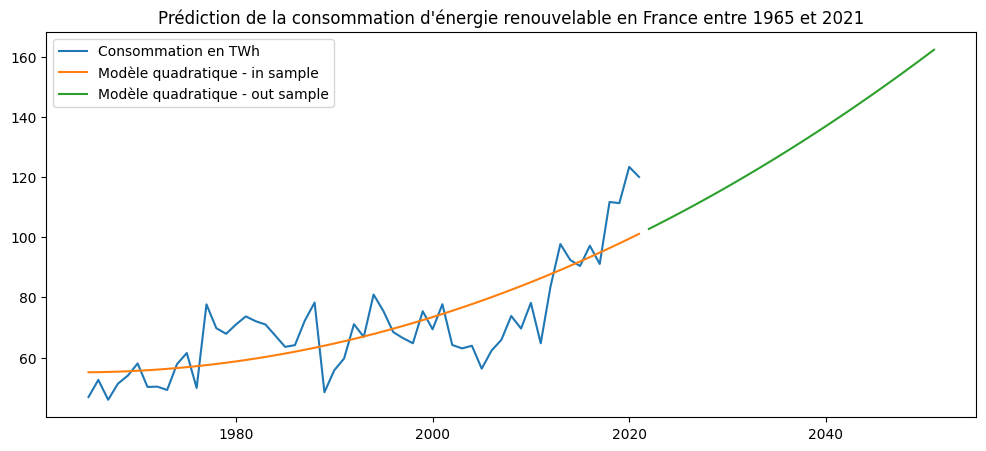

In [ ]:
n = 30 # number of predicting years 
future_years = pd.DataFrame(index=[i for i in range(2022,2022+n)], data={'Temps_2': [i**2 for i in range(58,58+n)]})
predictions = results_2.predict(future_years)


plt.figure(figsize=(12,5))
plt.title('Prédiction de la consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df['All_renew'], label='Consommation en TWh')
plt.plot(df['Prediction_2'], label='Modèle quadratique - in sample')
plt.plot(predictions, label='Modèle quadratique - out sample')
plt.legend(loc='best')
plt.show()

Ce que l'on peut observer rapidemment, c'est que notre modèle devient vite stupide. Il a identifié une tendance quadratique dans les données et ne prendra que cette dernière en compte pour prédire. Cela marchera peut-être pour des prédictions à court terme, mais le modèle deviendra obsolète pour les prédictions sur plusieurs dizaines d'années. 

Il est important de réfléchir aux limites de nos modèles! 

# Soyez créatif avec vos modèles! 

Nous avons commencé notre modélisation avec un modèle particulièrement simple. Mais rien vous empêche de complexifier votre approche. 

On pourrait tout à fait considérer un modèle dans lequel la consommation d'ER dépends de la population du pays, mais aussi de la consommation d'ER l'année précédente et du GDP per capita du pays. On aurait alors un DAG de la forme suivante: 

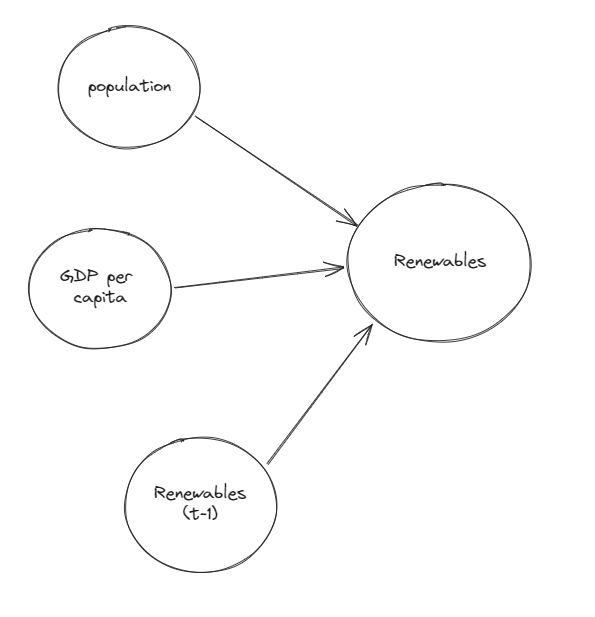

**Il faut toutefois considérer certaines choses lors de la construction de modèle plus complexes.**

1. Est-que la complexité supplémentaire est nécessaire pour expliquer ma variable d'intérêt?

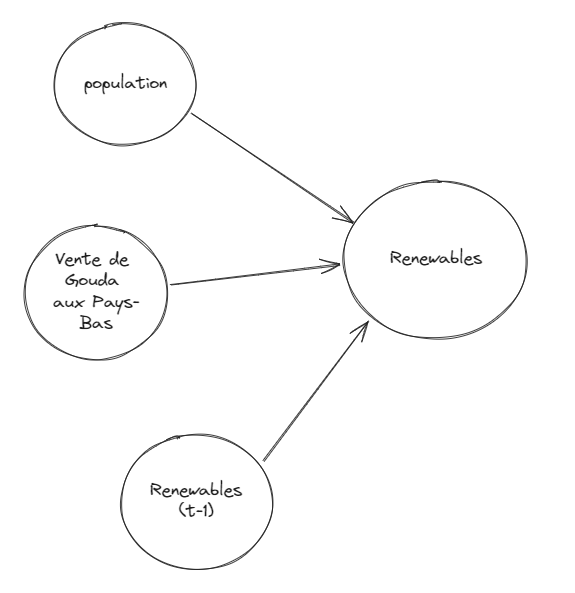

Le modèle ci-dessus est plus complexe que notre modèle linéaire simple mais n'est pas particulièrement logique en soi. Les mathématiques ne remplacent pas une construction logique et cohérente de nos modèles! 

2. Existe-t-il des liens de causalité cachés entre mes variables explicatives?

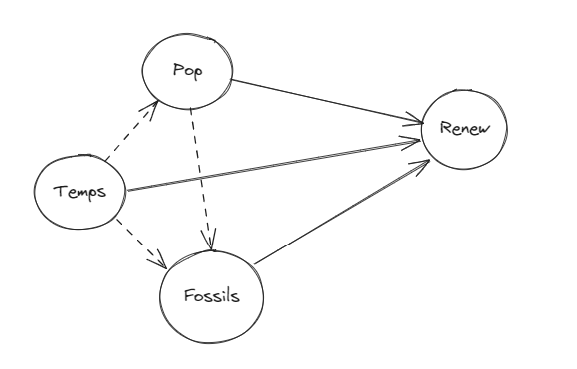

Dans le modèle au-dessus, nous modélisons la consommation d'ER comme fonction du temps, de la population d'un pays et de la consommation d'EF dans ce pays. Néanmoins, il existe des liens de causalité implicites dans ce modèle (lignes discontinues). Le niveau démographique a forcément un impact sur la consommation d'ER mais aussi celle d'EF. Et la population et consommation d'EF suivent des tendences. 

Le résultat est celui présenté ci-dessous, où l'on obtient en modèle avec des coefficients non significatifs pour la majorité. Ceci se produit à cause des liens de causalité implicites dans le modèle!

C'est ici que le raisonnement en termes de DAG est utile. Il nous permets de réfléchir a priori à notre modèle et nos hypothèses de départ. 


In [ ]:
model_3 = sm.OLS.from_formula('All_renew ~ Temps + All_Fossil + Pop', data=df)
results_3 = model_3.fit()

In [ ]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     26.20
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.57e-10
Time:                        14:34:55   Log-Likelihood:                -218.35
No. Observations:                  57   AIC:                             444.7
Df Residuals:                      53   BIC:                             452.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    860.0486   2491.805      0.345      0.731   -4137.880    5857.977
Temps         -0.5044      1.383     -0.365      0.717      -3.278       2.269
All_Fossil    -0.0193      0.009     -2.127      0.038      -0.037      -0.001
Pop         4.322e-06   4.76e-06      0.908      0.368   -5.22e-06    1.39e-05
==============================================================================
Omnibus:                        1.059   Durbin-Watson:                   0.651
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.893
Skew:                           0.302   Prob(JB):                        0.640
Kurtosis:                       2.889   Cond. No.                     9.33e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""